In [1]:
%load_ext autoreload
%autoreload 2

In [7]:
from formalisation import formalisation
from formalisation.examples import dp, bgp, hg, dp2

# Byzantine Generals Problem

In [8]:
bgp.w.process_with_callback(
    lambda w, r: w.reset_agents(),
    ['camp', 'make_order']
)

bgp.w.draw_trace_graph(notebook=False)

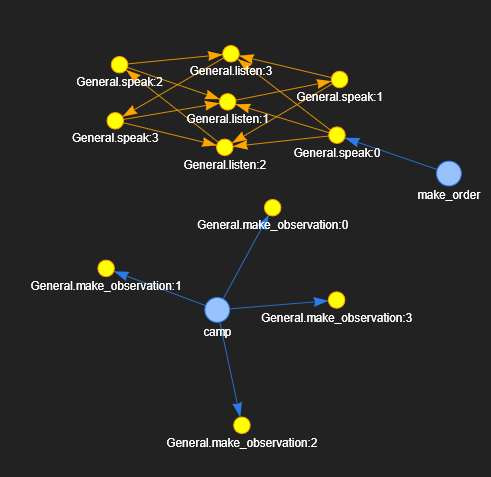

In [4]:
bgp.w.generate_fdl()

['General.make_observation -> {}',
 'General.speak -> {General.listen}',
 'General.listen -> {General.speak}',
 'camp -> {General.make_observation}',
 'make_order -> {}']

In [5]:
bgp.w.draw_flow_graph(notebook=False)

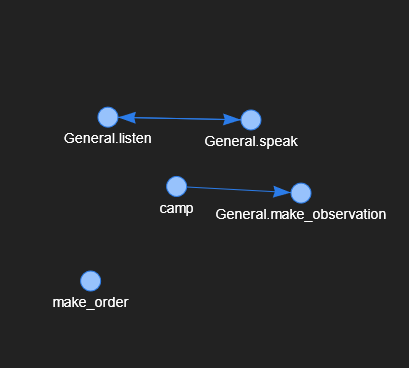

# Dining Philosophers

In [6]:
# Process the world.
# Note how no events were passed into the pipeline - the start point is inferred automatically.
dp.w.process_with_callback(
    lambda w, r: w.reset_agents(),
    ignore_exceptions=True
)

# Draw the trace graph for this world.
dp.w.draw_trace_graph(notebook=False)

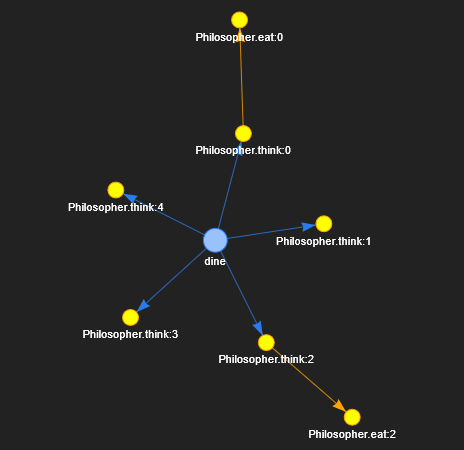

In [7]:
dp.w.generate_fdl()

['Philosopher.think -> {Philosopher.eat}',
 'Philosopher.eat -> {}',
 'dine -> {Philosopher.think}']

In [8]:
dp.w.draw_flow_graph(notebook=False)

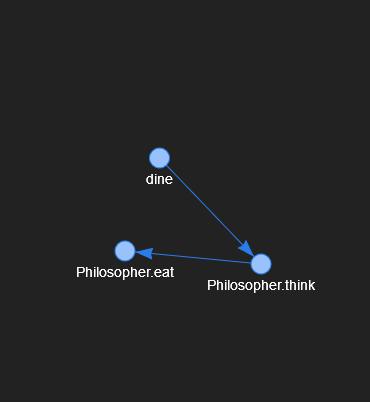

# Hansel and Gretel

In [9]:
hg.w.process_with_callback(
    lambda w, r: w.reset_agents()
)

hg.w.draw_trace_graph(notebook=False)

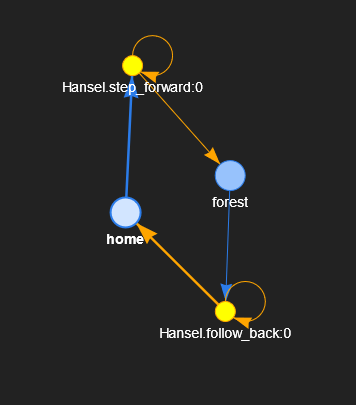

In [10]:
hg.w.generate_fdl()

['Hansel.step_forward -> {Hansel.step_forward}',
 'Hansel.follow_back -> {Hansel.follow_back}',
 'home -> {}',
 'forest -> {}']

In [11]:
hg.w.draw_flow_graph(notebook=False)

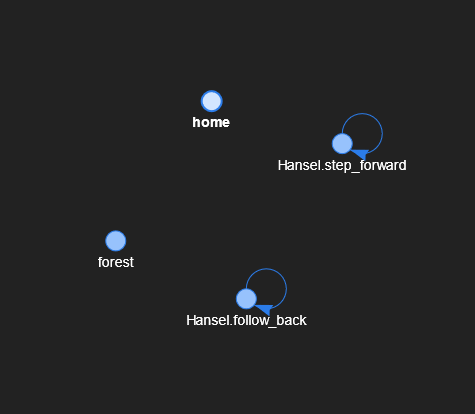

# More Examples

## Arbitrary FDL

In [12]:
# We can also generate the visualization for arbitrary FDL descriptions.
formalisation.visualize_fdl([
    'foo -> {bar, baz}',
    'bar -> {bar}',
    'baz -> {foobaz, barbaz}'
], notebook=False)

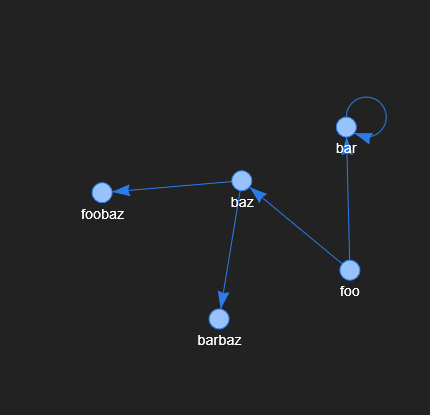

## Threading

In [3]:
dp2.w.process_with_callback(
    lambda w, r: w.reset_agents()
)

dp2.w.draw_trace_graph(notebook=False)

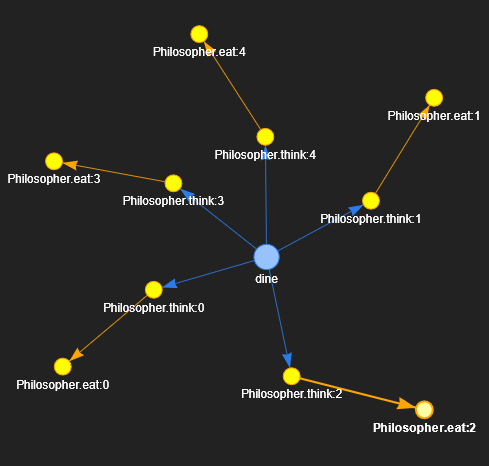

## Unique Events

So far, when drawing graphs we visualized every instance of an event as a single node. Sometimes, however, the same event may be called multiple times.

It is often more useful to visualize each execution of an event as a separate node as this more closely resembles what the code is doing.

In [9]:
bgp.w.draw_trace_graph(notebook=False, unique_events=True)

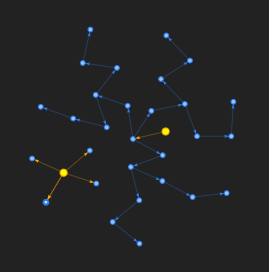
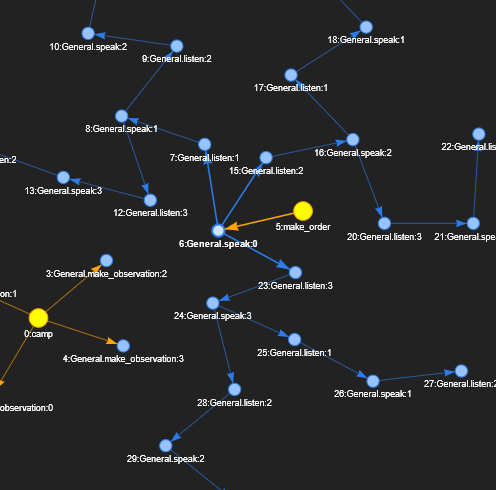